#### Project Purpose

This project uses the data that was previously cleaned in the Jupyter Notebook "Data Cleaning".   Telecommunications organizations often suffer from a loss of revenue due to customers choosing to terminate their services. As new companies enter the market, many customers choose to leave existing contracts for cheaper services. If there were a way to identify customers who may decide to cancel their account, a company might be able to intercede with special offers and services. In this analysis, I hope to find an answer to the question "Given a list of customer attributes, can we determine which customers might terminate their services?"

My goal with this analysis is to mitigate the impact of customer churn as a cause for a loss in revenue. I will do this by creating a model that can take data for a given customer and predict whether the customer might terminate their services with the telecommunications company. Armed with this model, the company would be able to periodically analyze its active customer list to produce a list of those in danger of leaving. Using this list, they may be able to devise methods for targeted customer retention.

#### Explanation of Classification Method

For this analysis, I have chosen to use the k-nearest neighbors (KNN) algorithm. This algorithm is a supervised machine learning approach that takes a data set with several parameters to predict the classification of a new target point (Chatterjee, 2020). It does this by taking the collection of features in the response data set and creating a data point for each observation and labels each point based on the target variable (in this case "Churn").

To ensure the ability of the model to accurately predict future outcomes, the data set is broken into "training" and "test" sets. The model is created using the training set using the KNN classification described in the previous paragraph. Then the model is performed on the test set to evaluate the accuracy of the predictions. In this phase, a data point is created for each test observation and then the algorithm evaluates the most predomanent classification of the specified number "neighbors". The predicted values are then compared to the actual classifications to determine the models likelihood to make correct future predictions.

In the case of this analysis, the result will be a model that can be used in determining whether a customer might be at risk for churn in the future. This can be done by applying it to data for active customers.

#### Assumptions

The KNN algorithm assumes "birds of a feather..." (...stick together) (Chatterjee, 2020). In essence, this means that when the features of a data point are similar, they can be grouped together. Metaphorically, this is like looking at a location on a map and determining where a point is located based on the region where it lies.

#### Preprocessing

My main goal in the data preprocessing phase of this project is to prepare the data to be used successfully in the KNN algorithm. Only numerical data can be used in a KNN analysis, so data will be either transformed to numeric values or dropped. Also, since KNN is a distance measurement, it works better when all features are on the same scale along the same axis. Therefore, the final data set will be transformed in this manner.

#### Steps to Prepare the Data

The following steps will be taken to prepare the data for analysis:

1. Import data to pandas dataframe
2. Determine variable types and those which may require further investigation
3. Convert binary variables to  yes = 1 and no = 0
4. Investigate potential categorical variables using bar charts, then convert categorical values to dummy variables
5. Drop columns that will not be used in classification
6. Create the arrays for feature and response variables
7. Scale the response feature array

##### <u>Step 1</u>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore') # Ignore warning messages for readability

In [42]:
# Read in dataset and view head
df = pd.read_csv('churn_clean.csv')
pd.options.display.max_columns = None
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


##### <u>Step 2</u>

In [43]:
# View column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

The target variable, Churn, is categorical.

The continuous variables that will be used in the analysis are:

>Lat, Lng, Timezone, Income, Outage_sec_perweek, Tenure, MonthlyCharge, Bandwidth_GB_Year, Zip, Population, Children, Age, Email, Contacts, Yearly_equip_failure

The categorical variables that will be used in the analysis are:

>Area, Gender, Marital, Contract, InternetService, PaymentMethod, Techie, Port_modem, Tablet, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8

##### <u>Step 3</u>

In [45]:
# Convert binary variables into yes = 1, no = 0 (ref 1)
cols = ['Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
df[cols] = df[cols].replace(to_replace = ['No', 'Yes'], value = [0, 1])

##### <u>Step 4</u>

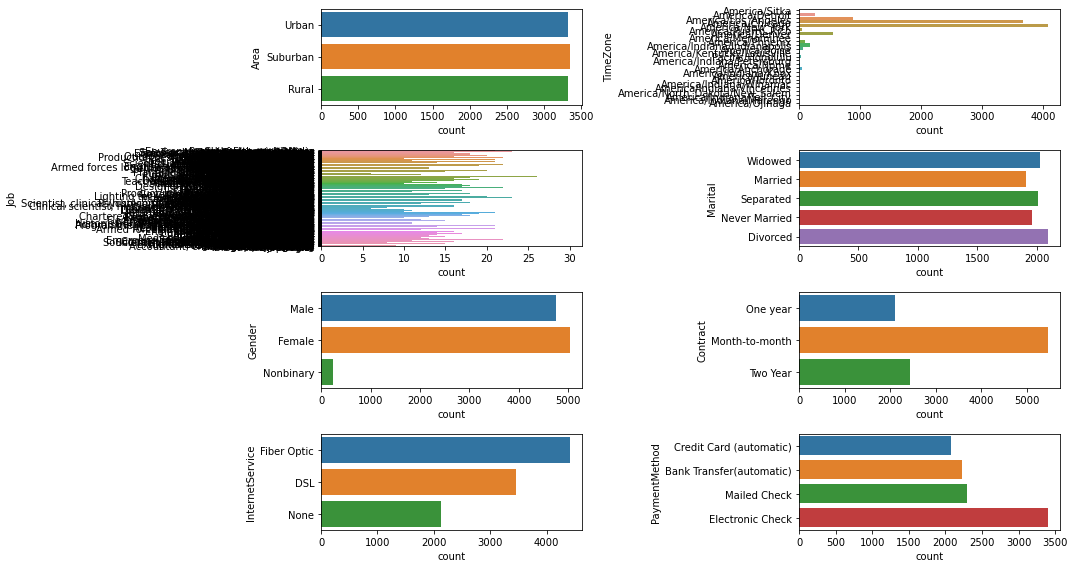

In [44]:
# View bar charts for potential categorical variables to determine number of categories
figure, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,8))
plt.subplot(4, 2, 1) 
sns.countplot(data = df, y = 'Area') 
plt.subplot(4, 2, 2) 
sns.countplot(data = df, y = 'TimeZone')
plt.subplot(4, 2, 3) 
sns.countplot(data = df, y = 'Job')
plt.subplot(4, 2, 4) 
sns.countplot(data = df, y = 'Marital')
plt.subplot(4, 2, 5) 
sns.countplot(data = df, y = 'Gender')
plt.subplot(4, 2, 6) 
sns.countplot(data = df, y = 'Contract')
plt.subplot(4, 2, 7) 
sns.countplot(data = df, y = 'InternetService')
plt.subplot(4, 2, 8) 
sns.countplot(data = df, y = 'PaymentMethod')
figure.tight_layout()
plt.show();

- Timezone and Job seem to have too many possible categories for meaningful separation into categories, so they will be treated as string variables.

In [46]:
# Create separate variables for each categorical value, with a 1 if the value is present in that row and 0 if not present
df = pd.get_dummies(data=df, columns=['Area', 'Marital', 'Gender', 'Contract', 'InternetService', 'PaymentMethod'])

##### <u>Step 5</u>

In [47]:
# Drop columns not needed for analysis
drops = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'TimeZone', 'Job']
df = df.drop(drops, axis = 1)

In [48]:
# View head of clean data set
df.head()

,Zip,Lat,Lng,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Contract_Month-to-month,Contract_One year,Contract_Two Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,99927,56.25100,-133.37571,38,0,68,28561.99,0,7.978323,10,0,1,0,1,1,1,0,1,1,0,0,0,1,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
1,48661,44.32893,-84.24080,10446,1,27,21704.77,1,11.699080,12,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
2,97148,45.35589,-123.24657,3735,4,50,9609.57,0,10.752800,9,0,1,1,1,0,1,1,0,0,0,0,0,1,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0
3,92014,32.96687,-117.24798,13863,1,48,18925.23,0,14.913540,15,2,0,1,0,0,1,0,1,0,0,0,1,0,1,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1
4,77461,29.38012,-95.80673,11352,0,83,40074.19,1,8.147417,16,2,1,0,1,0,0,0,0,0,0,1,1,0,0,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1


##### <u>Step 6</u>

In [49]:
# Create arrays for the features and the response variable
y = df['Churn'].values
X = df.drop('Churn', axis=1).values

##### <u>Step 7</u>

In [50]:
# Scale the features (ref 2)
X = scale(X)

#### Prepared Data

In [51]:
# Save cleaned dataframe to CSV 
df.to_csv('churn_clean_data_final.csv', index = False, encoding = 'utf-8') 

#### Splitting the Data

In [52]:
# Split into training and test set (ref 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#### Classification Method

To perform my KNN analysis, I will first perform hyperparameter tuning to ensure that the model has a proper fit.  I will then perform 10-fold cross-validation using the entire unsplit data set to look at accuracy before fitting the optimal KNN model to the training data.

In [53]:
# Determine an ideal value for KNN parameters to avoid over- or under-fitting (ref 3)

# Setup arrays and variables to store train and test accuracies
k_values = np.arange(1, 16)
cross_validation_fold = 10
accuracies = []
metrics = ['euclidean','manhattan'] 
neighbors = np.arange(1, 16)
param_grid  = dict(metric=metrics, n_neighbors=neighbors)

# Test parameters and create optimal KNN model
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', refit=True)
grid_search.fit(X_train, y_train)
optimal_knn = grid_search.best_estimator_
optimal_knn

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [54]:
# Perform 10-fold cross validation
cvscores_10 = cross_val_score(optimal_knn,X,y,cv=10)
print(np.mean(cvscores_10))

0.8368


In [55]:
# Fit the classifier to the data (ref 2)
optimal_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [56]:
# Print the accuracy (ref 2)
print("The model has an accuracy score of", optimal_knn.score(X_test, y_test))

The model has an accuracy score of 0.841


In [57]:
# Predict the labels for the training data X (ref 2)
y_pred = optimal_knn.predict(X_test)

# Generate a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1470
           1       0.81      0.52      0.64       530

    accuracy                           0.84      2000
   macro avg       0.83      0.74      0.77      2000
weighted avg       0.84      0.84      0.83      2000



In [58]:
# View parametar values for confusion matrix (ref 5)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positive:",tp)
print("False Positive:",fp)
print("True Negative:",tn)
print("False Negative:",fn)

True Positive: 278
False Positive: 66
True Negative: 1404
False Negative: 252


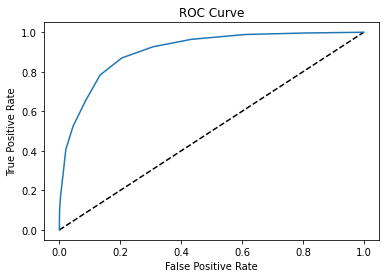

In [59]:
# Compute predicted probabilities: y_pred_prob  (ref 2)
y_pred_prob = optimal_knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [60]:
# Compute predicted probabilities: y_pred_prob (ref 2) 
y_pred_prob = optimal_knn.predict_proba(X_test)[:,1]

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(optimal_knn, X, y, scoring = 'roc_auc', cv=5)

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.8473617  0.86905853 0.95460403 0.94431203 0.89250417]


In [61]:
# Compute the average AUC
print('The average AUC of the model is:', np.mean(cv_auc))

The average AUC of the model is: 0.9015680913874984


#### Results

The accuracy of the model is fairly high at 84%. This means of all the samples in the testing set, 84% were classified correctly. This model also scores well in precision in both customers who churn and do not. This means that there are not many false positives detected in the test predictions. The recall score for customers who do not churn is also high, but it is low for customers who churn. This means that the instances of classifying a true positive for churn are only 58%.

The area under the ROC curve measures how well the model can distinguish between the predicted classifications. This parameter is measured at values between zero and one. The higher the AUC, the better the model is at predicting churn. The score for AUC for this model is 90%, meaning that it is very likely to predict that a customer will churn.

Overall, it appears that the KNN model does an excellent job of predicting whether a customer will churn. This means that if we were to use this model with new customer data in the future, we would be likely to predict whether the customer would be likely to terminate their services with the telecommunications company. To accomplish this, new data will be compared to the existing data. The algorithm will use all of the features to create a data point for comparison. It will then locate the 15 nearest data points in the existing data set. The most prominent classification for "churn" of the 15 neighbors will be used to predict the classification for "churn" of the new data point.

This gives the organization a powerful tool in which to focus customer interaction. By having the ability to predict which customers are in danger of terminating their services, the company may be able to intercede with targeted offers and discounts. This would ensure a better Return on Investment compared to offering these types of benefits to their entire customer base. Resources could be periodically focused in areas where revenue may be lost if a customer decides to end their contract to potentially gain customer loyalty.

#### Sources

- Chatterjee, M. (2020, February). The Introduction of KNN Algorithm: What is KNN Algorithm? Retrieved January 24, 2021, from https://www.mygreatlearning.com/blog/knn-algorithm-introduction/

#### Helpful Sites Used in Coding Project

1. https://stackoverflow.com/questions/51672709/converting-no-and-yes-into-0-and-1-in-pandas-dataframe/51672855
2. Much of the code for section D comes from the course "Supervised Learning with scikit-learn" which was included in the D209 official study material. 
3. https://sijanb.com.np/posts/how-to-tune-hyperparameter-in-k-nearest-neighbors-classifier/
4. https://stackoverflow.com/questions/51904126/write-a-numpy-ndarray-to-an-xlsx-spreadsheet
5. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html